In [35]:
import pandas as pd #for computation -- library used for these reason
import numpy as np #data manipulation
import matplotlib.pyplot as plt #data visualization

%matplotlib inline 
#magic function, used to control the behaviour of iPython itself

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [36]:
#with panda library we are going to read the data witn the "read" function
apple = pd.read_csv('https://github.com/TheNotoriousPIV/predictiveTool/blob/e36c84132d8989b34353bb7c972ab88da0ffc70e/AAPL.csv')
apple.head() #with this function the top rows of the file are displayed

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-02-11,12.669643,12.778571,12.626429,12.744643,10.912909,367572800
1,2011-02-14,12.742500,12.838571,12.739643,12.827857,10.984161,310416400
2,2011-02-15,12.828214,12.856071,12.769643,12.853571,11.006181,284174800
3,2011-02-16,12.885714,13.032143,12.875000,12.968929,11.104959,481157600
4,2011-02-17,12.758929,12.866786,12.732857,12.796429,10.957253,530583200


In [37]:
apple.info() #total number of rows, columns, data typ, check if there are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2770 non-null   object 
 1   Open       2770 non-null   float64
 2   High       2770 non-null   float64
 3   Low        2770 non-null   float64
 4   Close      2770 non-null   float64
 5   Adj Close  2770 non-null   float64
 6   Volume     2770 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.6+ KB


In [38]:
apple['Date'] = pd.to_datetime(apple['Date']) #converting date column in a different format

In [39]:
print(f'Dataframe contains stock prices between {apple.Date.min()} and {apple.Date.max()}')
print(f'Total days = {(apple.Date.max() - apple.Date.min()).days} days')

Dataframe contains stock prices between 2011-02-11 00:00:00 and 2022-02-11 00:00:00
Total days = 4018 days


In [40]:
apple.describe() #a series of info on the data

,Open,High,Low,Close,Adj Close,Volume
count,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2.770000e+03
mean,47.392232,47.889303,46.901916,47.413563,45.605962,2.360178e+08
std,40.236790,40.717611,39.767632,40.261385,40.832395,1.925660e+08
min,11.310000,11.346429,11.089286,11.261429,9.642874,4.100000e+07
25%,21.007857,21.221876,20.725268,20.922499,18.045956,1.049363e+08
50%,30.578750,30.888750,30.402500,30.576250,28.173146,1.636962e+08
75%,52.115002,52.418124,51.686875,52.156250,50.660843,3.056431e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,1.506120e+09


<AxesSubplot:>

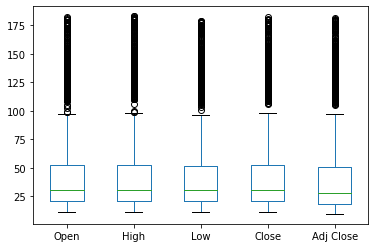

In [41]:
#creating a boxplot to visualiza the layout
apple[['Open','High','Low','Close', 'Adj Close']].plot(kind='box')

In [42]:
#setting the layout for the plot
layout = go.Layout(
    title='Stock prices for Apple',
    xaxis=dict(
            title='Date',
            titlefont=dict(
                family='Courier, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis = dict(
            title = 'Price',
            titlefont = dict(
                family = 'Courier, monospace',
                size = 18,
                color= '#7f7f7f'
            )
        )
)

apple_data = [{'x':apple['Date'], 'y': apple['Close']}]
plot = go.Figure(data=apple_data, layout=layout)

In [43]:
#plot(plot) #plottingoffline
iplot(plot)

In [44]:
#building the regression model
#Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split 

#for processing
#Transform features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
#Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [45]:
 #Split the data into train and test
    #X contain the indipendent variable, filter: the inputs, the labels
    #Y dependent variable, target variable (price): outputs
X = np.array(apple.index).reshape(-1,1)
Y = apple['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [46]:
#Feature scaling
#common requirements for AI
#passing X train data
#z = (u-x)/s
scaler = StandardScaler().fit(X_train)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
 #creating a linear model
#lm - linear model to declare a LR funcition
lm = LinearRegression()
lm.fit(X_train, Y_train)
#fit method to pass the data

LinearRegression()

In [49]:
#plot actual and predicted values for train data set
trace0 = go.Scatter(
    x= X_train.T[0],
    y= Y_train,
    mode = 'markers',
    name = 'Actual'
    )
trace1 = go.Scatter(
    x= X_train.T[0],
    y= lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
    )
   
apple_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=apple_data, layout=layout)

In [50]:
iplot(plot2)

In [51]:
#calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.689895941466619	490.3666409078713
MSE       491.39754462062155	490.3666409078713

